# 1. LSTM

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import data

In [15]:
amzn = pd.read_csv('Dataset B\AMZN.csv',parse_dates=['Date'],index_col=['Date'])
csco = pd.read_csv('Dataset B\CSCO.csv',parse_dates=['Date'],index_col=['Date'])
print(amzn.head())
print(csco.head())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200
            Open      High       Low     Close  Adj Close     Volume
Date                                                                
1990-02-16   0.0  0.079861  0.073785  0.077257   0.059806  940636800
1990-02-20   0.0  0.079861  0.074653  0.079861   0.061822  151862400
1990-02-21   0.0  0.078993  0.075521  0.078125   0.060478   70531200
1990-02-22   0.0  0.081597  0.078993  0.078993   0.061150   45216000
1990-02-23   0.0  0.079861  0.078125  0.078559   0.060814   44697600


## EDA

In [ ]:
print(amzn.info())
print(csco.info())

<class 'pandas.core.frame.DataFrame'>

DatetimeIndex: 5758 entries, 1997-05-15 to 2020-04-01

Data columns (total 6 columns):

 #   Column     Non-Null Count  Dtype  

---  ------     --------------  -----  

 0   Open       5758 non-null   float64

 1   High       5758 non-null   float64

 2   Low        5758 non-null   float64

 3   Close      5758 non-null   float64

 4   Adj Close  5758 non-null   float64

 5   Volume     5758 non-null   int64  

dtypes: float64(5), int64(1)

memory usage: 314.9 KB

None

<class 'pandas.core.frame.DataFrame'>

DatetimeIndex: 7589 entries, 1990-02-16 to 2020-04-01

Data columns (total 6 columns):

 #   Column     Non-Null Count  Dtype  

---  ------     --------------  -----  

 0   Open       7589 non-null   float64

 1   High       7589 non-null   float64

 2   Low        7589 non-null   float64

 3   Close      7589 non-null   float64

 4   Adj Close  7589 non-null   float64

 5   Volume     7589 non-null   int64  

dtypes: float64(5), int64(1)



Mengecek jumlah baris dan kolom

In [ ]:
print(amzn.shape)
print(csco.shape)

(5758, 6)

(7589, 6)


In [ ]:
print(amzn.isna().sum())
print(csco.isna().sum())

Open         0

High         0

Low          0

Close        0

Adj Close    0

Volume       0

dtype: int64

Open         0

High         0

Low          0

Close        0

Adj Close    0

Volume       0

dtype: int64


In [16]:
df1 = pd.read_csv('Dataset B\AMZN.csv')
df2 = pd.read_csv('Dataset B\CSCO.csv')
print(df1.isna().sum())
print(df2.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Tidak terdapat NULL values, bahkan ketika data tidak diparse.

Dropping unused columns. Kita hanya menggunakan date dan close price.

In [17]:
amzn_price=pd.DataFrame(amzn['Close']).rename(columns={'Close':'Price'})
csco_price=pd.DataFrame(csco['Close']).rename(columns={'Close':'Price'})
print(amzn_price)
print(csco_price)

                  Price
Date                   
1997-05-15     1.958333
1997-05-16     1.729167
1997-05-19     1.708333
1997-05-20     1.635417
1997-05-21     1.427083
...                 ...
2020-03-26  1955.489990
2020-03-27  1900.099976
2020-03-30  1963.949951
2020-03-31  1949.719971
2020-04-01  1907.699951

[5758 rows x 1 columns]
                Price
Date                 
1990-02-16   0.077257
1990-02-20   0.079861
1990-02-21   0.078125
1990-02-22   0.078993
1990-02-23   0.078559
...               ...
2020-03-26  40.580002
2020-03-27  38.820000
2020-03-30  40.320000
2020-03-31  39.310001
2020-04-01  38.330002

[7589 rows x 1 columns]


Visualizing Price

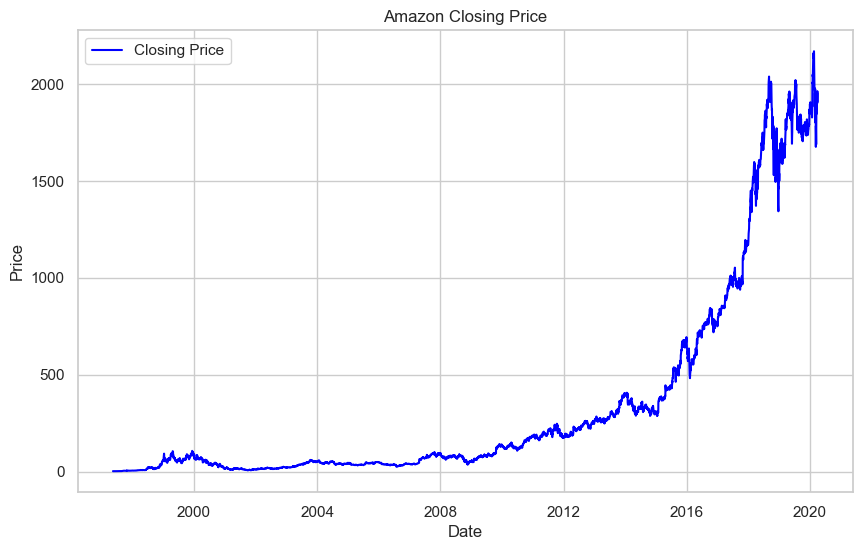

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=amzn_price, x='Date', y='Price', label='Closing Price', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Amazon Closing Price')

plt.show()


Terlihat bahwa saham Amazon meningkat pesat di antara 2016-2020, dengan nilai tertingginya di atas 2000 pada tahun 2020. Sejak tahun 1997 sahamnya terus naik sampai 2020. Tidak terlihat pergolakan signifikan, kecuali pada sekitar tahun 2018 yang sempat menurun sekitar 600.

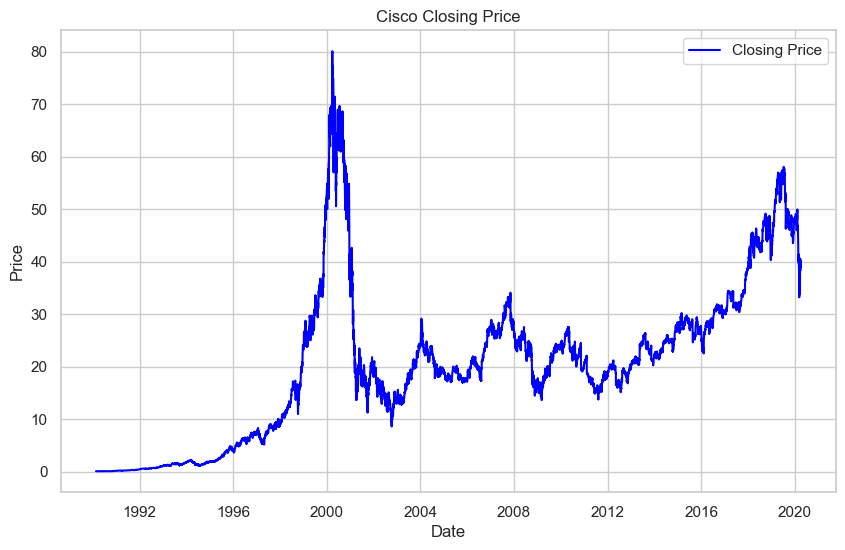

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=csco_price, x='Date', y='Price', label='Closing Price', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Cisco Closing Price')

plt.show()

Closing price cisco mengalami terjun bebas pada sekitar tahun 2000, dan terus mengalami naik-turun selama 1 dekade. Harganya mulai naik pada tahun 2016. Dibandingkan dengan Amazon, closing price Cisco jauh lebih kecil, lebih dari 10x lipat lebih kecil.

### Resampling
Digunakan untuk menyederhanakan visualisasi, mengurangi noise dan memperjelas trends yang ada

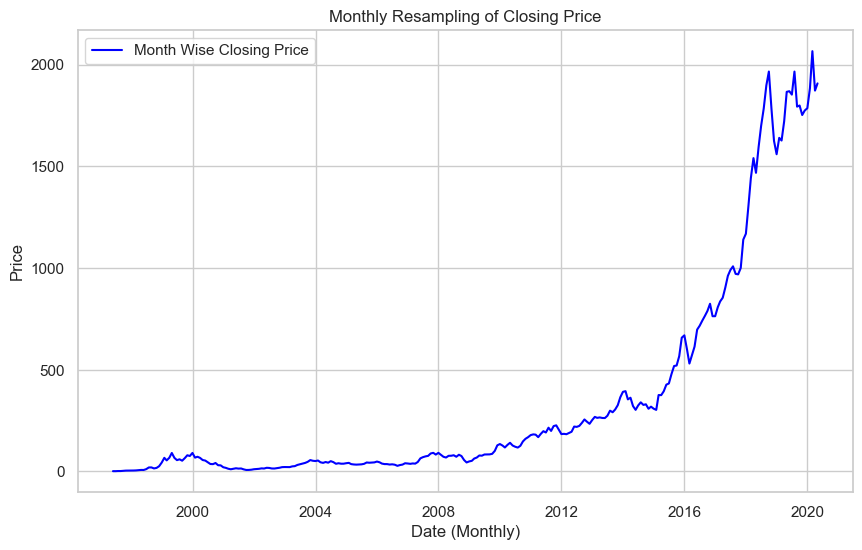

In [ ]:
# AMAZON
amzn_resampled = amzn_price.resample('M').mean() # Resampling to monthly frequency, menggunakan nilai rata-rata sebagai perwakilan

plt.figure(figsize=(10, 6))
sns.lineplot(data=amzn_resampled, x=amzn_resampled.index, y='Price', label='Month Wise Closing Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('Price')
plt.title('Monthly Resampling of Closing Price')

plt.show()

Di sini grafik terlihat lebih bersih dan terlihat terdapat kenaikan yang pesat di antara 2016-2020.

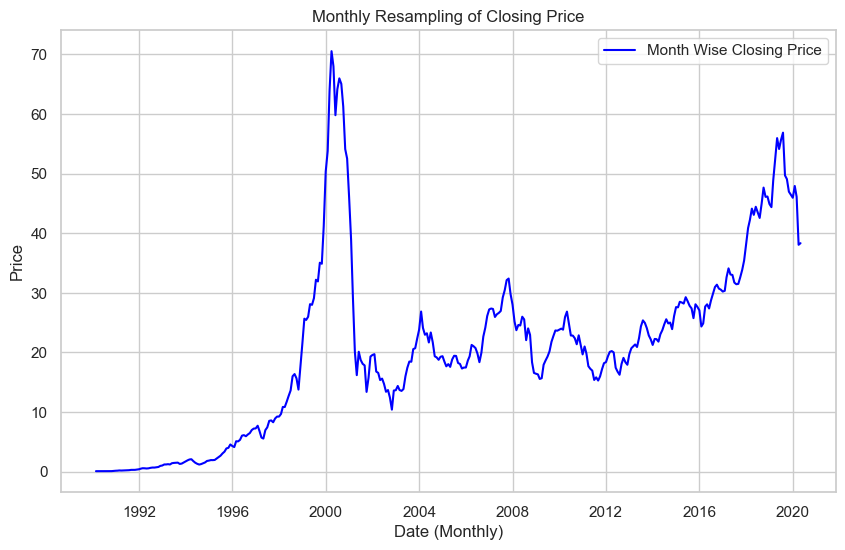

In [ ]:
# CISCO
csco_resampled = csco_price.resample('M').mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=csco_resampled, x=csco_resampled.index, y='Price', label='Month Wise Closing Price', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('Price')
plt.title('Monthly Resampling of Closing Price')

plt.show()

Dari grafik di atas terlihat bahwa saham CSCO mengalami masa jayanya pada tahun 2000 yang mengalami lonjakan tinggi dan terjun bebas sekitar 1 tahun kemudian. Tahun-tahun berikutnya harganya mengalami naik turun, namun bertahap mulai membaik dan mengalami kenaikan dari tahun 2016 ke 2019.

### Autocorrelation
Untuk mendeteksi seasonality

<Figure size 1200x600 with 0 Axes>

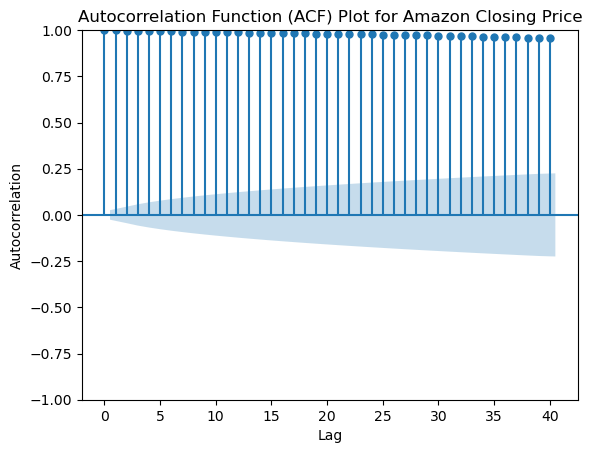

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(amzn_price['Price'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot for Amazon Closing Price')
plt.show()

Tidak terlihat adanya seasonality pada amazon stock closing price

<Figure size 1200x600 with 0 Axes>

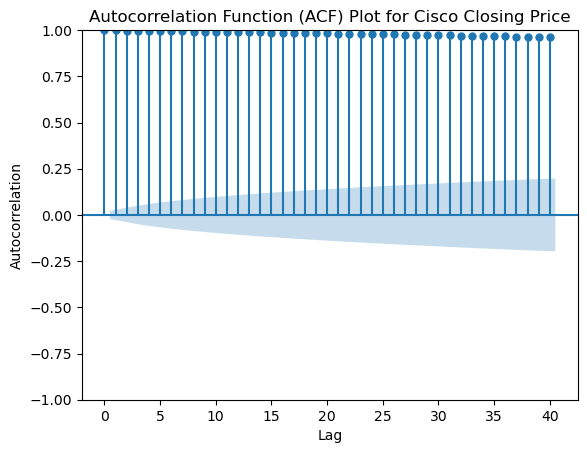

In [19]:
plt.figure(figsize=(12, 6))
plot_acf(csco_price['Price'], lags=40) # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot for Cisco Closing Price')
plt.show()

### Data preprocessing and preparation

Create sequences

In [ ]:
import torch
def create_sequences(data, window_size=5, horizon=1):
    sequences = []
    targets = []
    for i in range(len(data) - window_size - horizon + 1):
        feature = data[i:i + window_size]
        target = data[i + window_size : i + window_size + horizon]
        sequences.append(feature)
        targets.append(target)
    sequences = np.array(sequences)
    targets = np.array(targets)
    return torch.tensor(sequences), torch.tensor(targets)

In [ ]:
x1, y1 = create_sequences(amzn_price['Price'], window_size=5, horizon=1)
x2, y2 = create_sequences(csco_price['Price'], window_size=5, horizon=1)

In [ ]:
x1 = x1.numpy().reshape(x1.shape[0], x1.shape[1], 1)
x2 = x2.numpy().reshape(x2.shape[0], x2.shape[1], 1)

In [ ]:
min_size = min(len(x1), len(x2))
x1, y1 = x1[:min_size], y1[:min_size]
x2, y2 = x2[:min_size], y2[:min_size]

In [ ]:
print(f'x1 shape: {x1.shape}, y1 shape: {y1.shape}')
print(f'x2 shape: {x2.shape}, y2 shape: {y2.shape}')

x1 shape: (5753, 5, 1), y1 shape: torch.Size([5753, 1])

x2 shape: (5753, 5, 1), y2 shape: torch.Size([5753, 1])


Split data

In [ ]:
from sklearn.model_selection import train_test_split
amznx_train, amznx_test, amzny_train, amzny_test = train_test_split(x1, y1, test_size=0.1, shuffle=False)
amznx_train, amznx_val, amzny_train, amzny_val = train_test_split(amznx_train, amzny_train, test_size=0.111, shuffle=False)
cscox_train, cscox_test, cscoy_train, cscoy_test = train_test_split(x2, y2, test_size=0.1, shuffle=False)
cscox_train, cscox_val, cscoy_train, cscoy_val = train_test_split(cscox_train, cscoy_train, test_size=0.111, shuffle=False)

print(f'Training set:\nAMZN: {len(amznx_train)}\nCSCO: {len(cscox_train)}\n')
print(f'Validation set:\nAMZN: {len(amznx_val)}\nCSCO: {len(cscox_val)}\n')
print(f'Test set:\nAMZN: {len(amznx_test)}\nCSCO: {len(cscox_test)}\n')

Training set:

AMZN: 4602

CSCO: 4602



Validation set:

AMZN: 575

CSCO: 575



Test set:

AMZN: 576

CSCO: 576




In [ ]:
print(f'amznx_train shape: {amznx_train.shape}')
print(f'amznx_val shape: {amznx_val.shape}')
print(f'amznx_test shape: {amznx_test.shape}')
print(f'cscox_train shape: {cscox_train.shape}')
print(f'cscox_val shape: {cscox_val.shape}')
print(f'cscox_test shape: {cscox_test.shape}')

amznx_train shape: (4602, 5, 1)

amznx_val shape: (575, 5, 1)

amznx_test shape: (576, 5, 1)

cscox_train shape: (4602, 5, 1)

cscox_val shape: (575, 5, 1)

cscox_test shape: (576, 5, 1)


Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

# Reshape and scale training data
amznx_train_scaled = scaler1.fit_transform(amznx_train.reshape(-1, 1)).reshape(amznx_train.shape)
amzny_train_scaled = scaler1.transform(amzny_train.reshape(-1, 1)).reshape(amzny_train.shape)
cscox_train_scaled = scaler2.fit_transform(cscox_train.reshape(-1, 1)).reshape(cscox_train.shape)
cscoy_train_scaled = scaler2.transform(cscoy_train.reshape(-1, 1)).reshape(cscoy_train.shape)

# Transform validation and test data for Amazon
amznx_val_scaled = scaler1.transform(amznx_val.reshape(-1, 1)).reshape(amznx_val.shape)
amzny_val_scaled = scaler1.transform(amzny_val.reshape(-1, 1)).reshape(amzny_val.shape)
amznx_test_scaled = scaler1.transform(amznx_test.reshape(-1, 1)).reshape(amznx_test.shape)
amzny_test_scaled = scaler1.transform(amzny_test.reshape(-1, 1)).reshape(amzny_test.shape)

# Cisco
cscox_val_scaled = scaler2.transform(cscox_val.reshape(-1, 1)).reshape(cscox_val.shape)
cscoy_val_scaled = scaler2.transform(cscoy_val.reshape(-1, 1)).reshape(cscoy_val.shape)
cscox_test_scaled = scaler2.transform(cscox_test.reshape(-1, 1)).reshape(cscox_test.shape)
cscoy_test_scaled = scaler2.transform(cscoy_test.reshape(-1, 1)).reshape(cscoy_test.shape)

In [ ]:
print(f'amznx_train_scaled shape: {amznx_train_scaled.shape}')
print(f'amznx_val_scaled shape: {amznx_val_scaled.shape}')
print(f'amznx_test_scaled shape: {amznx_test_scaled.shape}')
print(f'cscox_train_scaled shape: {cscox_train_scaled.shape}')
print(f'cscox_val_scaled shape: {cscox_val_scaled.shape}')
print(f'cscox_test_scaled shape: {cscox_test_scaled.shape}')

amznx_train_scaled shape: (4602, 5, 1)

amznx_val_scaled shape: (575, 5, 1)

amznx_test_scaled shape: (576, 5, 1)

cscox_train_scaled shape: (4602, 5, 1)

cscox_val_scaled shape: (575, 5, 1)

cscox_test_scaled shape: (576, 5, 1)


### Modeling

Base architecture

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, concatenate

# Define inputs
amzn_input = Input(shape=(amznx_train_scaled.shape[1], amznx_train_scaled.shape[2]), name='amazon_input')
csco_input = Input(shape=(cscox_train_scaled.shape[1], cscox_train_scaled.shape[2]), name='cisco_input')

# Define LSTM layers for each input
amzn_lstm = LSTM(50, return_sequences=False)(amzn_input)
csco_lstm = LSTM(50, return_sequences=False)(csco_input)

# Combine the outputs of the LSTM layers
combined = concatenate([amzn_lstm, csco_lstm])

# Add dense layer(s)
dense = Dense(50, activation='relu')(combined)

amzn_output = Dense(1, activation='linear', name='amzn_output')(dense)
csco_output = Dense(1, activation='linear', name='csco_output')(dense)

# Define the model
model = Model(inputs=[amzn_input, csco_input], outputs=[amzn_output, csco_output])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(
    [amznx_train_scaled, cscox_train_scaled],  # Input features for training (AMZN and CSCO)
    [amzny_train_scaled, cscoy_train_scaled],  # Target outputs for training (AMZN and CSCO)
    validation_data=([amznx_val_scaled, cscox_val_scaled], [amzny_val_scaled, cscoy_val_scaled]),  # Validation data
    epochs=50,
    batch_size=32
)

Epoch 1/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0356 - val_loss: 0.0200

Epoch 2/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4917e-04 - val_loss: 0.0196

Epoch 3/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4684e-04 - val_loss: 0.0222

Epoch 4/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5878e-04 - val_loss: 0.0259

Epoch 5/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4901e-04 - val_loss: 0.0193

Epoch 6/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4309e-04 - val_loss: 0.0200

Epoch 7/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6230e-04 - val_loss: 0.0219

Epoch 8/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3879e-04 - val_loss: 0.0302

Epoch 9/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4995e-04 - val_loss: 0.0266

Epoch 10/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5868e-04 - val_loss: 0.0225

Epoch 11/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3566e-04 - val_loss

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
import tensorflow as tf
def eval (y_pred_amzn, y_pred_csco):
    # mengubah format tensor ke numpy arrays
    y_true_amzn, y_pred_amzn = np.array(amzny_test), np.array(y_pred_amzn)
    y_true_csco, y_pred_csco = np.array(cscoy_test), np.array(y_pred_csco)
    with tf.device('/CPU:0'):
        rmse_amzn = rmse(y_true_amzn, y_pred_amzn)
        mae_amzn = mae(y_true_amzn, y_pred_amzn)
        mape_amzn = mape(y_true_amzn, y_pred_amzn)

        # Hitung metrik evaluasi untuk CSCO
        rmse_csco = rmse(y_true_csco, y_pred_csco)
        mae_csco = mae(y_true_csco, y_pred_csco)
        mape_csco = mape(y_true_csco, y_pred_csco)

    print(f"AMZN Test Metrics:")
    print(f"  RMSE: {rmse_amzn:.4f}")
    print(f"  MAE : {mae_amzn:.4f}")
    print(f"  MAPE: {mape_amzn:.4f}%")

    print(f"CSCO Test Metrics:")
    print(f"  RMSE: {rmse_csco:.4f}")
    print(f"  MAE : {mae_csco:.4f}")
    print(f"  MAPE: {mape_csco:.4f}%")

In [ ]:
y_pred_amzn, y_pred_csco = model.predict([amznx_test_scaled, cscox_test_scaled])

y_pred_amzn_unscaled = scaler1.inverse_transform(y_pred_amzn)
y_pred_csco_unscaled = scaler2.inverse_transform(y_pred_csco)

eval(y_pred_amzn_unscaled,y_pred_csco_unscaled)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

AMZN Test Metrics:

  RMSE: 480.3083

  MAE : 468.8373

  MAPE: 26.7391%

CSCO Test Metrics:

  RMSE: 27.9243

  MAE : 27.6487

  MAPE: 153.3403%


Evaluasi RMSE, MAE, dan MAPE menggunakan nilai asli (versi unscaled) agar interpretasi lebih relevan dengan data asli.
Pada model dengan base architecture ini:
perbedaan antara prediksi dengan nilai asli untuk amazon berada di kisaran 468-480 satuan, dan cisco sekitar 27-28. Hasil amazon memiliki perbedaan sebesar sekitar 26.7% dan cisco sebesar 153.34%, sehingga dapat dikatakan bahwa model ini kurang dalam mempelajari stock cisco.

Modified Architecture

First test, menambah LSTM layers untuk masing-masing input, serta menambahkan 1 dense layer

In [ ]:
amzn_input = Input(shape=(amznx_train_scaled.shape[1], amznx_train_scaled.shape[2]), name='amazon_input')
csco_input = Input(shape=(cscox_train_scaled.shape[1], cscox_train_scaled.shape[2]), name='cisco_input')

# 2 LSTM layers for each
amzn_lstm = LSTM(50, return_sequences=True)(amzn_input)
amzn_lstm2 = LSTM(50, return_sequences=False)(amzn_lstm)
csco_lstm = LSTM(50, return_sequences=True)(csco_input)
csco_lstm2 = LSTM(50, return_sequences=False)(csco_lstm)
combined = concatenate([amzn_lstm2, csco_lstm2])

# Adding more dense layers
dense = Dense(50, activation='relu')(combined)
dense2 = Dense(50, activation='relu')(dense)

amzn_output = Dense(1, activation='linear', name='amzn_output')(dense2)
csco_output = Dense(1, activation='linear', name='csco_output')(dense2)

modif1 = Model(inputs=[amzn_input, csco_input], outputs=[amzn_output, csco_output])
modif1.compile(optimizer='adam', loss='mean_squared_error')

history1 = modif1.fit(
    [amznx_train_scaled, cscox_train_scaled],
    [amzny_train_scaled, cscoy_train_scaled],
    validation_data=([amznx_val_scaled, cscox_val_scaled], [amzny_val_scaled, cscoy_val_scaled]),
    epochs=50,
    batch_size=32
)

Epoch 1/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0393 - val_loss: 0.0260

Epoch 2/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9451e-04 - val_loss: 0.0269

Epoch 3/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0857e-04 - val_loss: 0.0299

Epoch 4/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9570e-04 - val_loss: 0.0388

Epoch 5/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1006e-04 - val_loss: 0.0384

Epoch 6/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7113e-04 - val_loss: 0.0295

Epoch 7/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4640e-04 - val_loss: 0.0465

Epoch 8/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8344e-04 - val_loss: 0.0312

Epoch 9/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0327e-04 - val_loss: 0.0310

Epoch 10/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0074e-04 - val_loss: 0.0369

Epoch 11/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9733e-04 - val_loss

Evaluating modif1

In [ ]:
y_pred_amzn, y_pred_csco = modif1.predict([amznx_test_scaled, cscox_test_scaled])
y_pred_amzn_unscaled = scaler1.inverse_transform(y_pred_amzn)
y_pred_csco_unscaled = scaler2.inverse_transform(y_pred_csco)

eval(y_pred_amzn_unscaled,y_pred_csco_unscaled)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

AMZN Test Metrics:

  RMSE: 256.2583

  MAE : 241.3831

  MAPE: 13.6849%

CSCO Test Metrics:

  RMSE: 28.1190

  MAE : 27.7339

  MAPE: 153.9052%


In [ ]:
import keras_tuner as kt
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout, concatenate

def build_model(hp):
    # Define inputs
    amzn_input = Input(shape=(amznx_train_scaled.shape[1], amznx_train_scaled.shape[2]), name='amazon_input')
    csco_input = Input(shape=(cscox_train_scaled.shape[1], cscox_train_scaled.shape[2]), name='cisco_input')

    # Define LSTM layers for each input
    amzn_lstm = LSTM(hp.Int('units_amzn_lstm', min_value=32, max_value=512, step=32), return_sequences=True)(amzn_input)
    amzn_lstm = LSTM(hp.Int('units_amzn_lstm2', min_value=32, max_value=512, step=32), return_sequences=False)(amzn_lstm)

    csco_lstm = LSTM(hp.Int('units_csco_lstm', min_value=32, max_value=512, step=32), return_sequences=True)(csco_input)
    csco_lstm = LSTM(hp.Int('units_csco_lstm2', min_value=32, max_value=512, step=32), return_sequences=False)(csco_lstm)

    # Combine the outputs of the LSTM layers
    combined = concatenate([amzn_lstm, csco_lstm])

    # Add dense layers
    dense = Dense(hp.Int('units_dense', min_value=32, max_value=512, step=32), activation='relu')(combined)
    dense = Dropout(hp.Float('dropout', 0, 0.5, step=0.1))(dense)
    dense = Dense(hp.Int('units_dense2', min_value=32, max_value=512, step=32), activation='relu')(dense)

    # Define output layers
    amzn_output = Dense(1, activation='linear', name='amzn_output')(dense)
    csco_output = Dense(1, activation='linear', name='csco_output')(dense)

    # Define the model
    model = Model(inputs=[amzn_input, csco_input], outputs=[amzn_output, csco_output])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)

tuner.search(
    [amznx_train_scaled, cscox_train_scaled],
    [amzny_train_scaled, cscoy_train_scaled],
    validation_data=([amznx_val_scaled, cscox_val_scaled], [amzny_val_scaled, cscoy_val_scaled]),
    epochs=50,
    batch_size=32
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")


Trial 90 Complete [00h 03m 31s]

val_loss: 0.002410497283563018



Best val_loss So Far: 0.0011703164782375097

Total elapsed time: 09h 20m 50s

Best hyperparameters: {'units_amzn_lstm': 160, 'units_amzn_lstm2': 512, 'units_csco_lstm': 224, 'units_csco_lstm2': 352, 'units_dense': 416, 'dropout': 0.0, 'units_dense2': 128, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}


In [ ]:
# Menyusun model dengan hyperparameter dengan best val_loss yang telah ditentukan oleh keras tuner
amzn_input = Input(shape=(amznx_train_scaled.shape[1], amznx_train_scaled.shape[2]), name='amazon_input')
csco_input = Input(shape=(cscox_train_scaled.shape[1], cscox_train_scaled.shape[2]), name='cisco_input')

# Define LSTM layers for each input with the best hyperparameters
amzn_lstm1 = LSTM(160, return_sequences=True)(amzn_input)
amzn_lstm2 = LSTM(512, return_sequences=False)(amzn_lstm1)

csco_lstm1 = LSTM(224, return_sequences=True)(csco_input)
csco_lstm2 = LSTM(352, return_sequences=False)(csco_lstm1)

# Combine the outputs of the LSTM layers
combined = concatenate([amzn_lstm2, csco_lstm2])

dense1 = Dense(416, activation='relu')(combined)
dense2 = Dense(128, activation='relu')(dense1)

amzn_output = Dense(1, activation='linear', name='amzn_output')(dense2)
csco_output = Dense(1, activation='linear', name='csco_output')(dense2)

modif2 = Model(inputs=[amzn_input, csco_input], outputs=[amzn_output, csco_output])
modif2.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history2 = modif2.fit(
    [amznx_train_scaled, cscox_train_scaled],  # Input features for training (AMZN and CSCO)
    [amzny_train_scaled, cscoy_train_scaled],  # Target outputs for training (AMZN and CSCO)
    validation_data=([amznx_val_scaled, cscox_val_scaled], [amzny_val_scaled, cscoy_val_scaled]),  # Validation data
    epochs=50,
    batch_size=32
)

Epoch 1/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - loss: 0.0136 - val_loss: 0.0057

Epoch 2/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 4.6917e-04 - val_loss: 0.0171

Epoch 3/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 3.7422e-04 - val_loss: 0.0112

Epoch 4/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 4.7824e-04 - val_loss: 0.0143

Epoch 5/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 5.5260e-04 - val_loss: 0.0085

Epoch 6/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 4.1137e-04 - val_loss: 0.0171

Epoch 7/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 4.1542e-04 - val_loss: 0.0109

Epoch 8/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 3.7014e-04 - val_loss: 0.0178

Epoch 9/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 4.2046e-04 - val_loss: 0.0063

Epoch 10/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 2.9629e-04 - val_loss: 0.0092

Epoch 11/50

144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 2.7109e-

In [ ]:
y_pred_amzn, y_pred_csco = modif2.predict([amznx_test_scaled, cscox_test_scaled])
y_pred_amzn_unscaled = scaler1.inverse_transform(y_pred_amzn)
y_pred_csco_unscaled = scaler2.inverse_transform(y_pred_csco)

eval(y_pred_amzn_unscaled,y_pred_csco_unscaled)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

AMZN Test Metrics:

  RMSE: 194.8253

  MAE : 188.4073

  MAPE: 10.7491%

CSCO Test Metrics:

  RMSE: 6.4891

  MAE : 6.4450

  MAPE: 35.7066%


Model yang dibangun dengan bantuan keras tuner menghasilkan error yang paling minimal.

Link Video
https://drive.google.com/drive/folders/1RrJKYm7hmXG7dGczXuOPMJO3pXTOKbk5?usp=sharing
*Video digabung untuk no. 1-3

# 2. Autoencoder

In [2]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Dropout
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from skimage.metrics import structural_similarity as ssim

Loading data

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)
mask = np.isin(y_combined, [2, 3])
x_filtered = x_combined[mask]
y_filtered = y_combined[mask]

In [ ]:
print(x_filtered.shape)
print(y_filtered.shape)

(14000, 28, 28)
(14000,)


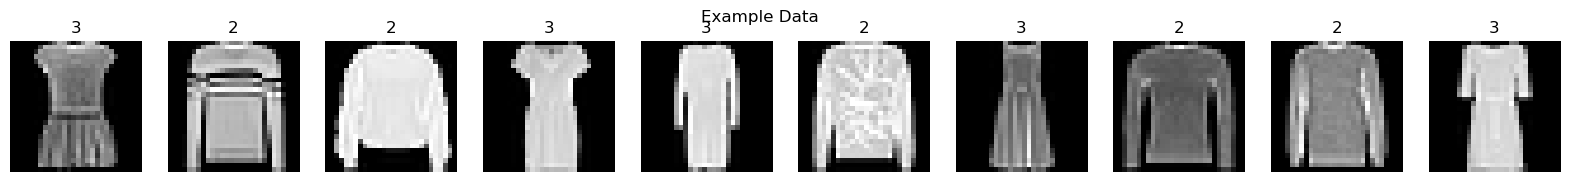

In [ ]:
def display_example_data(x, y, title):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        axes[i].imshow(x[i], cmap='gray')
        axes[i].set_title(y[i])
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

display_example_data(x_filtered, y_filtered, "Example Data")

Splitting data: 80% train, 10% validation, 10% test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_filtered, test_size=0.1, random_state=42, stratify=y_filtered)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.111, random_state=42, stratify=y_train)
# use stratify to make sure label distribution is equal between train, val and test data
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(11201, 28, 28)
(1400, 28, 28)
(1399, 28, 28)
(11201,)
(1400,)
(1399,)


Scaling the data

In [6]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (11201, 28, 28), y_train shape: (11201,)
x_val shape: (1399, 28, 28), y_val shape: (1399,)
x_test shape: (1400, 28, 28), y_test shape: (1400,)


In [7]:
def display_label_distribution(y, title):
    unique, counts = np.unique(y, return_counts=True)
    distribution = dict(zip(unique, counts))
    print(f"{title} label distribution: \n{distribution}")

# Menampilkan distribusi label
display_label_distribution(y_filtered, "Total set")
display_label_distribution(y_train, "Train set")
display_label_distribution(y_val, "Validation set")
display_label_distribution(y_test, "Test set")

Total set label distribution: 
{2: 7000, 3: 7000}
Train set label distribution: 
{2: 5600, 3: 5601}
Validation set label distribution: 
{2: 700, 3: 699}
Test set label distribution: 
{2: 700, 3: 700}


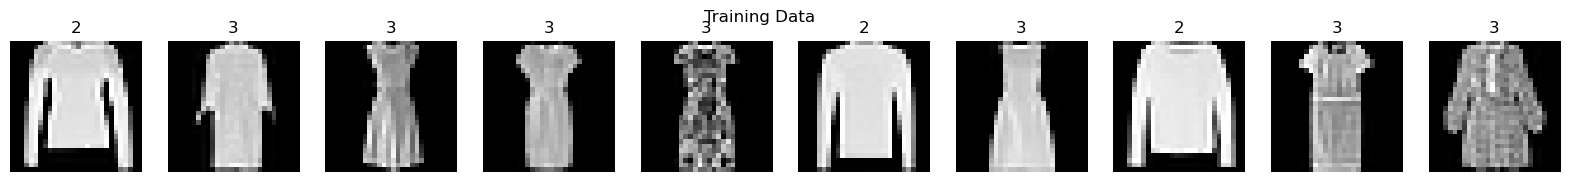

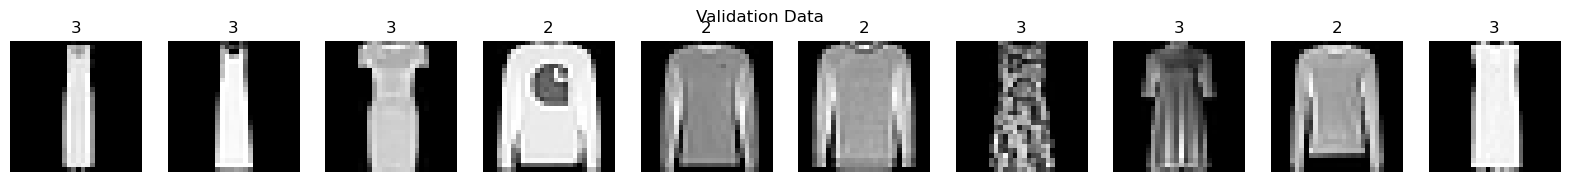

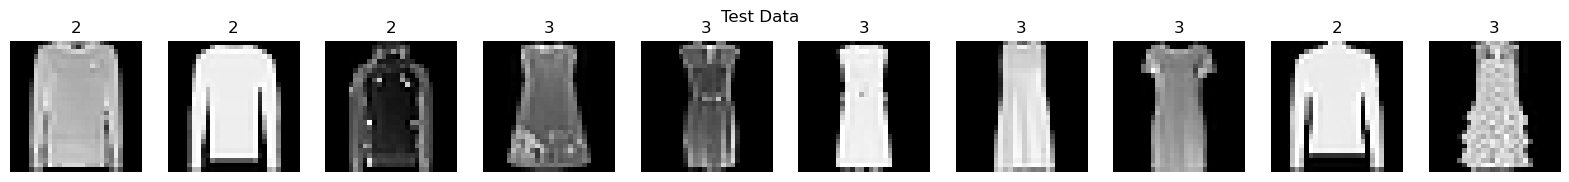

In [ ]:
display_example_data(x_train, y_train, "Training Data")
display_example_data(x_val, y_val, "Validation Data")
display_example_data(x_test, y_test, "Test Data")

## Modeling

Baseline Architecture

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
input_shape = (28, 28, 1)
latent_dim = 128  # Dimensi latent space

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten(name='FC_enc')(x)
encoded = Dense(latent_dim, activation='relu')(x)

# Decoder
x = Dense(6272, activation='relu',name='FC_dec')(encoded)  # 6272 = 14 * 14 * 32
x = Reshape((14, 14, 32))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(inputs, decoded, name='Base')
autoencoder.compile(optimizer=Adam(), loss=MeanSquaredError())
autoencoder.summary()

Model: "Base"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_enc (Flatten)                │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_dec (Dense)                  │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,621,889 (6.19 MB)

 Trainable params: 1,621,889 (6.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=32, validation_data=(x_val, x_val))

Epoch 1/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0419 - val_loss: 0.0139

Epoch 2/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0116 - val_loss: 0.0093

Epoch 3/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0085 - val_loss: 0.0088

Epoch 4/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0074 - val_loss: 0.0076

Epoch 5/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0067 - val_loss: 0.0067

Epoch 6/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0061 - val_loss: 0.0069

Epoch 7/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0059 - val_loss: 0.0064

Epoch 8/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0054 - val_loss: 0.0057

Epoch 9/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0050 - val_loss: 0.0059

Epoch 10/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0049 - val_loss: 0.0060

Epoch 11/50

351/351 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0051 - val_loss: 0.0056

Epoch 12/50

351/3

In [11]:
def calculate_ssim(decoded_imgs):
   # Initialize list to store SSIM scores
    ssim_scores = []
    # Compute SSIM for each pair of original and decoded images
    for i in range(len(x_test)):
        original = np.squeeze(x_test[i])  # Original image
        decoded = np.squeeze(decoded_imgs[i])  # Decoded image
        score = ssim(original, decoded, data_range=original.max() - original.min())
        ssim_scores.append(score)
    # Calculate the mean SSIM score
    mean_ssim = np.mean(ssim_scores)
    print(f"Mean SSIM Score on Test Data: {mean_ssim}")

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
calculate_ssim(decoded_imgs)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Mean SSIM Score on Test Data: 0.8851092425950625


In [ ]:
encoder = Model(inputs, encoded)
test_au_features = encoder.predict(x_test)
print(test_au_features.shape)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

(1400, 128)


Modification 1

In [ ]:
input_shape = (28, 28, 1)
latent_dim = 128

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)
x = Flatten(name='FC_enc')(x)
encoded = Dense(latent_dim, activation='relu')(x)

# Decoder
x = Dense(7 * 7 * 64, activation='relu', name='FC_dec')(encoded)
x = Reshape((7, 7, 64))(x)
x = Dropout(0.25)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.25)(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model_modif1 = Model(inputs, decoded, name='Modif1')
model_modif1.compile(optimizer=Adam(), loss=MeanSquaredError())
model_modif1.summary()

Model: "Modif1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_enc (Flatten)                │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_dec (Dense)                  │ (None, 3136)           │       404,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,233 (2.45 MB)

 Trainable params: 643,233 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_modif1.fit(x_train, x_train, epochs=50, batch_size=32, validation_data=(x_val, x_val))
decoded_imgs1 = model_modif1.predict(x_test)
calculate_ssim(decoded_imgs1)

Epoch 1/50
 40/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1072

W0000 00:00:1720342500.648577     161 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720342500.650301     161 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0512

W0000 00:00:1720342508.070614     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


351/351 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 0.0511 - val_loss: 0.0211
Epoch 2/50
 40/351 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0198

W0000 00:00:1720342508.381751     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0179 - val_loss: 0.0132
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0149 - val_loss: 0.0123
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0139 - val_loss: 0.0108
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0127 - val_loss: 0.0105
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0121 - val_loss: 0.0097
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0117 - val_loss: 0.0093
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0113 - val_loss: 0.0101
Epoch 9/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0112 - val_loss: 0.0098
Epoch 10/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0109 - val_loss: 0.0086
Epoch 11/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0107 - val_loss: 0.0098
Epoch 12/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0109 - val_loss: 0.0083
Epoch 13/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0

W0000 00:00:1720342561.832064     158 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


W0000 00:00:1720342562.321034     159 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Mean SSIM Score on Test Data: 0.8171065018810211


Modif 2

In [9]:
input_shape = (28, 28, 1)
latent_dim = 64

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)
x = Flatten(name='FC_enc')(x)
encoded = Dense(latent_dim, activation='relu')(x)

# Decoder
x = Dense(7 * 7 * 64, activation='relu', name='FC_dec')(encoded)
x = Reshape((7, 7, 64))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)  # Another upsampling to match the original dimensions
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model_modif2 = Model(inputs, decoded, name='Modif2')
model_modif2.compile(optimizer=Adam(), loss=MeanSquaredError())
model_modif2.summary()

Model: "Modif2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_enc (Flatten)                │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC_dec (Dense)                  │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 633,633 (2.42 MB)

 Trainable params: 633,633 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_modif2.fit(x_train, x_train, epochs=50, batch_size=32, validation_data=(x_val, x_val))
decoded_imgs2 = model_modif2.predict(x_test)
calculate_ssim(decoded_imgs2)

Epoch 1/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0052 - val_loss: 0.0060
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0051 - val_loss: 0.0066
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0051 - val_loss: 0.0057
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0051 - val_loss: 0.0059
Epoch 9/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 10/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0051 - val_loss: 0.0057
Epoch 11/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0051 - val_loss: 0.0063
Epoch 12/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 

Tidak ditemukan cara tuning yang tepat untuk meningkatkan hasil ssim (structural similarity index). Pengecilan learning rate, penambahan layer dan dropout malah menurunkan hasil ssim. Mengurangi dimensi latent pun tidak berpengaruh. Terlihat bahwa layer-layer sederhana seperti pada base architecture lebih bagus untuk data ini.

Link Video
https://drive.google.com/drive/folders/1RrJKYm7hmXG7dGczXuOPMJO3pXTOKbk5?usp=sharing
*Video digabung untuk no. 1-3

# 3. GAN

a. Jelaskan cara kerja dari arsitektur tersebut yang dideskripsikan dalam
gambar di bawah ini

Arsitektur yang ditampilkan adalah arsitektur dari GAN (Generative Adversarial Network), sebuah bentuk unsupervised machine learning yang terdiri dari 2 submodel - generator dan discriminator. Generator merupakan model yang digunakan untuk menciptakan image palsu, dimana discriminator harus mampu membedakan mana image yang merupakan hasil buatan generator dan yang mana merupakan data dari training. Kedua submodel ini saling berkompetisi untuk outperform yang lainnya. Jika discriminator mampu membedakan yang mana real dan fake, maka ia tidak diupdate dan hanya generator yang diupdate modelnya dan sebaliknya. Kesalahan atau kekurangan model dapat dilihat dan dipelajari oleh kedua model tersebut sehingga bisa saling improve. Dalam arsitektur di bawah ini, terlihat bahwa ada 2 input untuk discriminator, 1 dari training dan 1 lagi merupakan hasil buatan generator. Generator akan menggunakan random noise vector untuk menghasilkan output yang bervariasi. Kedua sumber images ini (generator dan train set) akan difeed ke discriminator untuk ditentukan apakah asli (dari train set) atau palsu (dari generator). Semakin handal discriminator dalam membedakan yang asli dan palsu, maka generator harus bekerja lebih keras untuk menciptakan image yang tidak bisa dibedakan oleh discriminator. Contoh penggunaan GAN di dunia nyata adalah image generation. Generator yang bagus dapat menciptakan image yang bahkan tidak dapat dibedakan mana asli atau palsu oleh discriminator.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, BatchNormalization, Activation, Embedding, multiply, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from tqdm import tqdm_notebook
%matplotlib inline
import tensorflow

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)
mask = np.isin(y_combined, [2, 3])
x_filtered = x_combined[mask]
y_filtered = y_combined[mask]
x_train, x_test, y_train, y_test = train_test_split(x_filtered, y_filtered, test_size=0.1, random_state=42, stratify=y_filtered)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.111, random_state=42, stratify=y_train)

x_train = x_train / 255
x_val = x_val/255
x_test = x_test / 255


In [ ]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (11201, 28, 28), y_train shape: (11201,)
x_val shape: (1399, 28, 28), y_val shape: (1399,)
x_test shape: (1400, 28, 28), y_test shape: (1400,)


In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
# Hyperparameters
noise_dim = 50
label_dim = 2  # Number of classes
img_size = 28

Generator Network

In [ ]:
random_input = Input(shape=(noise_dim,))
label = Input(shape=(1,), dtype='int32')

label_embedding = Flatten()(Embedding(label_dim, noise_dim)(label))
# convert categorical variables, like class labels, into a form that a neural network can understand and process effectively
model_input = multiply([random_input, label_embedding])

x = Dense(128)(model_input)
x = Dense(256)(x)
x = Dense(512)(x)
x = Dense(1024)(x)
x = Dense(img_size * img_size)(x)
x = Reshape((img_size, img_size, 1))(x)

generated_image = Activation('sigmoid')(x)

generator_network = Model([random_input, label], generated_image)
generator_network.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 50)                100       ['input_16[0][0]']            
                                                                                                  
 input_15 (InputLayer)       [(None, 50)]                 0         []                            
                                                                                                  
 flatten_6 (Flatten)         (None, 50)                   0         ['embedding_4[0][0]']         
                                                                                            

Discriminator Network

In [ ]:
img = Input(shape=(img_size, img_size, 1))
label = Input(shape=(1,), dtype='int32')
# input: real images with their corresponding labels and fake images generated with their corresponding labels

label_embedding = Flatten()(Embedding(label_dim, img_size * img_size)(label))
label_embedding = Reshape((img_size, img_size, 1))(label_embedding)

model_input = Concatenate(axis=-1)([img, label_embedding])
# concatenates the actual image (img) with the reshaped label embedding along the channel dimension

x = Flatten()(model_input)
x = Dense(512)(x)
x = Dense(1024)(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = Dense(1)(x)

real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = Model([img, label], real_vs_fake_output)
discriminator_network.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_18 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 embedding_5 (Embedding)     (None, 1, 784)               1568      ['input_18[0][0]']            
                                                                                                  
 flatten_7 (Flatten)         (None, 784)                  0         ['embedding_5[0][0]']         
                                                                                                  
 input_17 (InputLayer)       [(None, 28, 28, 1)]          0         []                            
                                                                                            

In [ ]:
discriminator_network.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

Conditional GAN = generating images conditioned on specific attributes or classes, e.g. generating images of specific classes (like dogs or cats)

In [ ]:
# The generator takes noise and the target label as input and generates images
z = Input(shape=(noise_dim,))
label = Input(shape=(1,))
g_output = generator_network([z, label])

# Only train the generator
discriminator_network.trainable = False

# The discriminator takes generated images as input and determines validity
d_output = discriminator_network([g_output, label])

# The combined model (stacked generator and discriminator)
gan_model = Model([z, label], d_output)
gan_model.summary()
gan_model.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 50)]                 0         []                            
                                                                                                  
 input_20 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 model_6 (Functional)        (None, 28, 28, 1)            1500148   ['input_19[0][0]',            
                                                                     'input_20[0][0]']            
                                                                                                  
 model_7 (Functional)        (None, 1)                    2905121   ['model_6[0][0]',       

Data Generators

In [ ]:
# Indices of Zero Images
indices = [i for i in range(len(x_train))]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size, label_dim):
    random_noise_batch = get_random_noise(batch_size, noise_size)
    random_labels = np.random.randint(0, label_dim, batch_size)
    fake_samples = generator_network.predict_on_batch([random_noise_batch, random_labels])
    return fake_samples, random_labels

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = x_train[np.array(random_indices),:]
    real_labels = y_train[np.array(random_indices)]
    return real_images, real_labels

def show_generator_results(generator_network, noise_size, label_dim):
    plt.figure(figsize=(7, 7))
    fake_samples, _ = get_fake_samples(generator_network, 9, noise_size, label_dim)
    for j in range(9):
        plt.subplot(330 + 1 + j)
        plt.imshow(fake_samples[j,:,:,-1], cmap='gray_r')
        plt.axis('off')
    plt.show()

Training

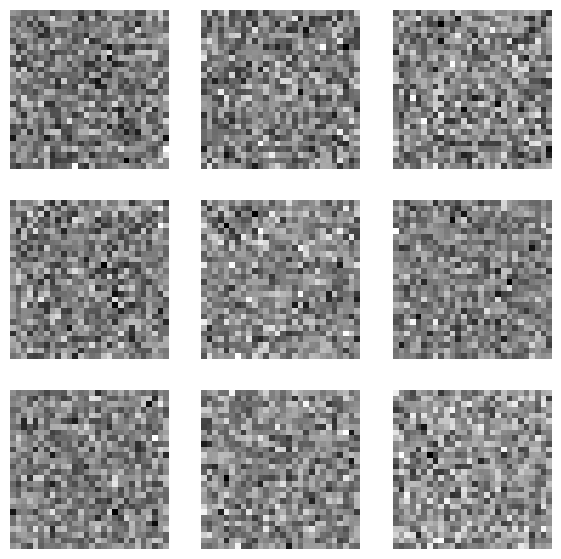

Epoch: 0, Step: 0, [D loss: 0.7138868570327759, acc.: 23.000000417232513%] [G loss: 4.181087493896484]
Epoch: 0, Step: 50, [D loss: 0.08529546856880188, acc.: 99.00000095367432%] [G loss: 4.597626209259033]
Epoch: 0, Step: 100, [D loss: 0.006595599465072155, acc.: 100.0%] [G loss: 6.879861831665039]
Epoch: 0, Step: 150, [D loss: 0.002629386493936181, acc.: 100.0%] [G loss: 7.093504428863525]
Epoch: 0, Step: 200, [D loss: 0.0007662417483516037, acc.: 100.0%] [G loss: 7.752322196960449]
Epoch: 0, Step: 250, [D loss: 0.0006154520669952035, acc.: 100.0%] [G loss: 7.881159782409668]
Epoch: 0, Step: 300, [D loss: 0.0002756909525487572, acc.: 100.0%] [G loss: 8.469096183776855]
Epoch: 0, Step: 350, [D loss: 0.00021129292144905776, acc.: 100.0%] [G loss: 9.741116523742676]
Epoch: 0, Step: 400, [D loss: 7.83469804446213e-05, acc.: 100.0%] [G loss: 14.368370056152344]
Epoch: 0, Step: 450, [D loss: 5.424788105301559e-05, acc.: 100.0%] [G loss: 10.652706146240234]
Epoch: 1, Step: 0, [D loss: 6.738

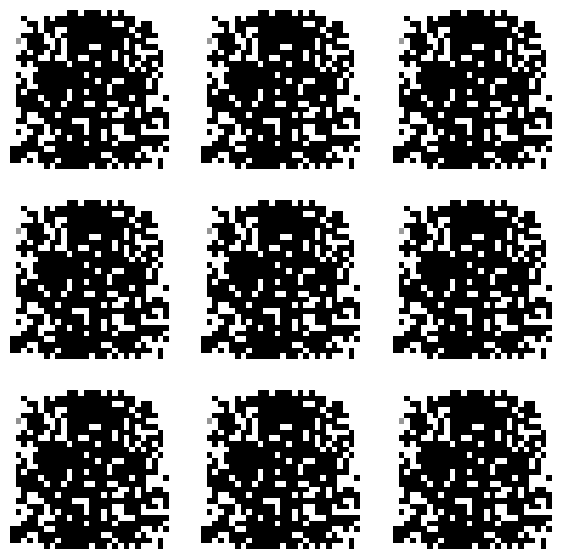

Epoch: 10, Step: 0, [D loss: 1.2020824442515732e-06, acc.: 100.0%] [G loss: 16.260332107543945]
Epoch: 10, Step: 50, [D loss: 1.0536953709561203e-07, acc.: 100.0%] [G loss: 16.380626678466797]
Epoch: 10, Step: 100, [D loss: 5.449988975669839e-07, acc.: 100.0%] [G loss: 16.425687789916992]
Epoch: 10, Step: 150, [D loss: 1.3030097761657089e-05, acc.: 100.0%] [G loss: 16.417621612548828]
Epoch: 10, Step: 200, [D loss: 9.222200958447502e-08, acc.: 100.0%] [G loss: 16.412630081176758]
Epoch: 10, Step: 250, [D loss: 9.523352559881459e-07, acc.: 100.0%] [G loss: 16.460725784301758]
Epoch: 10, Step: 300, [D loss: 2.595203795863199e-06, acc.: 100.0%] [G loss: 16.524066925048828]
Epoch: 10, Step: 350, [D loss: 8.765538694888164e-08, acc.: 100.0%] [G loss: 16.567394256591797]
Epoch: 10, Step: 400, [D loss: 5.791357580164913e-07, acc.: 100.0%] [G loss: 16.62462615966797]
Epoch: 10, Step: 450, [D loss: 2.0972584025003016e-07, acc.: 100.0%] [G loss: 16.699594497680664]
Epoch: 11, Step: 0, [D loss: 4

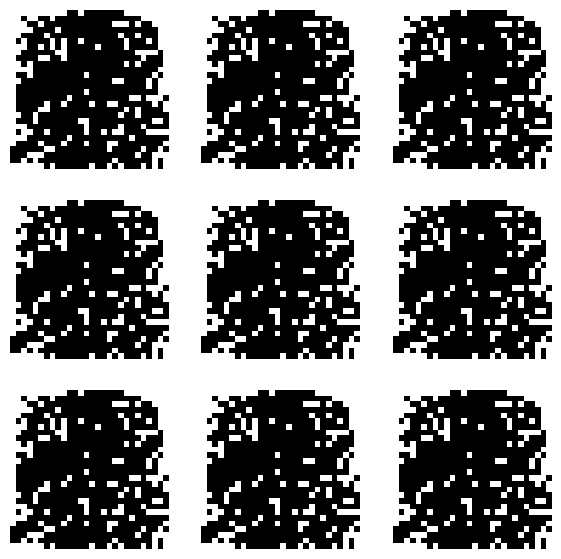

Epoch: 20, Step: 0, [D loss: 1.388888559716861e-08, acc.: 100.0%] [G loss: 19.398639678955078]
Epoch: 20, Step: 50, [D loss: 3.958509964263612e-09, acc.: 100.0%] [G loss: 19.398584365844727]
Epoch: 20, Step: 100, [D loss: 9.254364385924418e-09, acc.: 100.0%] [G loss: 19.311195373535156]
Epoch: 20, Step: 150, [D loss: 2.7471797281464205e-08, acc.: 100.0%] [G loss: 19.1866397857666]
Epoch: 20, Step: 200, [D loss: 1.5429705513270164e-08, acc.: 100.0%] [G loss: 19.079059600830078]
Epoch: 20, Step: 250, [D loss: 1.4360755251630053e-08, acc.: 100.0%] [G loss: 19.335796356201172]
Epoch: 20, Step: 300, [D loss: 1.8008412538961238e-09, acc.: 100.0%] [G loss: 19.479026794433594]
Epoch: 20, Step: 350, [D loss: 2.3499895362988354e-09, acc.: 100.0%] [G loss: 19.517410278320312]
Epoch: 20, Step: 400, [D loss: 1.6752270681763548e-08, acc.: 100.0%] [G loss: 19.585548400878906]
Epoch: 20, Step: 450, [D loss: 3.268763393293739e-08, acc.: 100.0%] [G loss: 19.60406494140625]
Epoch: 21, Step: 0, [D loss: 3

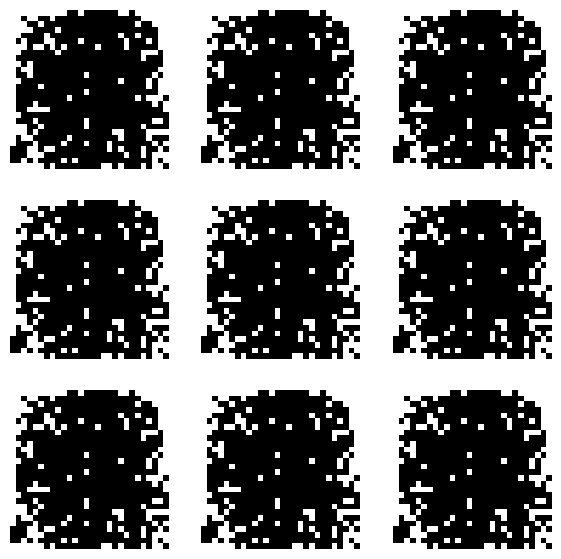

Epoch: 30, Step: 0, [D loss: 1.879731925669148e-09, acc.: 100.0%] [G loss: 21.41033935546875]
Epoch: 30, Step: 50, [D loss: 4.950098109191003e-10, acc.: 100.0%] [G loss: 21.306468963623047]
Epoch: 30, Step: 100, [D loss: 2.711501856378362e-10, acc.: 100.0%] [G loss: 21.548755645751953]
Epoch: 30, Step: 150, [D loss: 1.8890290720552372e-10, acc.: 100.0%] [G loss: 21.804800033569336]
Epoch: 30, Step: 200, [D loss: 3.027225803364786e-09, acc.: 100.0%] [G loss: 21.848215103149414]
Epoch: 30, Step: 250, [D loss: 1.2562653139980284e-09, acc.: 100.0%] [G loss: 21.976755142211914]
Epoch: 30, Step: 300, [D loss: 1.2827064410636524e-10, acc.: 100.0%] [G loss: 22.114910125732422]
Epoch: 30, Step: 350, [D loss: 6.406736252628775e-10, acc.: 100.0%] [G loss: 22.249608993530273]
Epoch: 30, Step: 400, [D loss: 2.8261453177691465e-09, acc.: 100.0%] [G loss: 22.081649780273438]
Epoch: 30, Step: 450, [D loss: 1.6451782158810602e-08, acc.: 100.0%] [G loss: 21.883617401123047]
Epoch: 31, Step: 0, [D loss: 

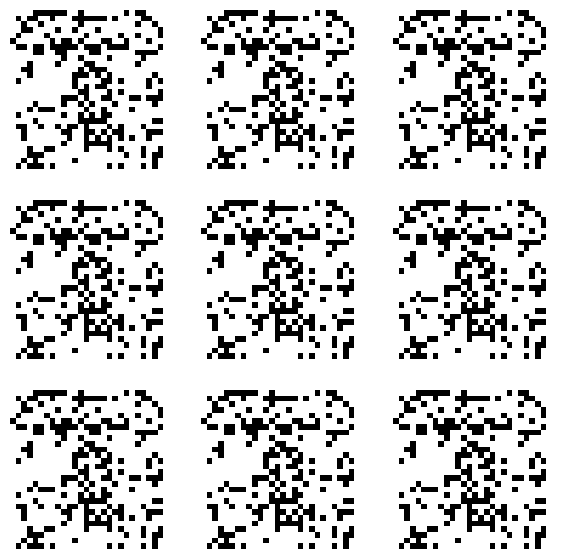

Epoch: 40, Step: 0, [D loss: 1.1169553282286415e-08, acc.: 100.0%] [G loss: 152.11880493164062]
Epoch: 40, Step: 50, [D loss: 4.002949651749077e-07, acc.: 100.0%] [G loss: 153.0493621826172]
Epoch: 40, Step: 100, [D loss: 0.0005050085601396859, acc.: 100.0%] [G loss: 152.34017944335938]
Epoch: 40, Step: 150, [D loss: 2.3507345758844167e-06, acc.: 100.0%] [G loss: 152.74224853515625]
Epoch: 40, Step: 200, [D loss: 1.0220186918985519e-09, acc.: 100.0%] [G loss: 152.64620971679688]
Epoch: 40, Step: 250, [D loss: 6.201895663693335e-10, acc.: 100.0%] [G loss: 151.9485321044922]
Epoch: 40, Step: 300, [D loss: 1.987673137193724e-08, acc.: 100.0%] [G loss: 152.77456665039062]
Epoch: 40, Step: 350, [D loss: 2.1797632143716328e-05, acc.: 100.0%] [G loss: 152.08294677734375]
Epoch: 40, Step: 400, [D loss: 3.561148886888077e-08, acc.: 100.0%] [G loss: 152.39810180664062]
Epoch: 40, Step: 450, [D loss: 2.354773931401155e-09, acc.: 100.0%] [G loss: 153.50396728515625]
Epoch: 41, Step: 0, [D loss: 1.

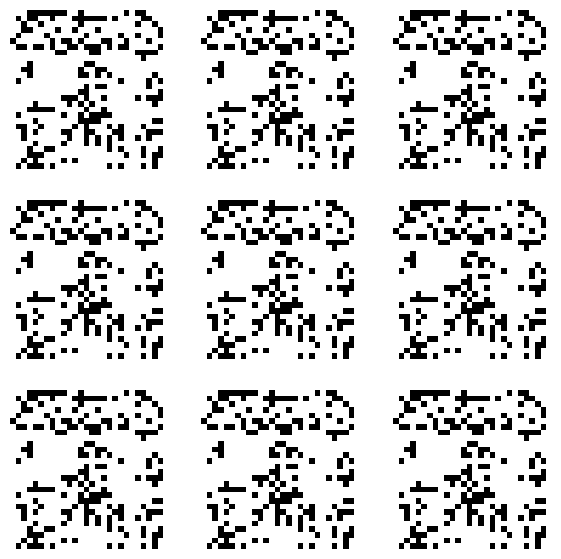

Epoch: 50, Step: 0, [D loss: 3.405247221352492e-12, acc.: 100.0%] [G loss: 125.7505111694336]
Epoch: 50, Step: 50, [D loss: 2.7264125037618214e-06, acc.: 100.0%] [G loss: 125.91690063476562]
Epoch: 50, Step: 100, [D loss: 3.3440131219641955e-10, acc.: 100.0%] [G loss: 125.81654357910156]
Epoch: 50, Step: 150, [D loss: 1.30099593320665e-08, acc.: 100.0%] [G loss: 125.98628997802734]
Epoch: 50, Step: 200, [D loss: 1.6711889649911882e-09, acc.: 100.0%] [G loss: 125.71533966064453]
Epoch: 50, Step: 250, [D loss: 1.2545872607461206e-07, acc.: 100.0%] [G loss: 126.93782043457031]
Epoch: 50, Step: 300, [D loss: 3.5774165851876205e-09, acc.: 100.0%] [G loss: 125.8798599243164]
Epoch: 50, Step: 350, [D loss: 4.349446580675931e-09, acc.: 100.0%] [G loss: 125.94991302490234]
Epoch: 50, Step: 400, [D loss: 1.8370421850377738e-10, acc.: 100.0%] [G loss: 126.29918670654297]
Epoch: 50, Step: 450, [D loss: 2.8169540268116466e-13, acc.: 100.0%] [G loss: 126.1243667602539]
Epoch: 51, Step: 0, [D loss: 9

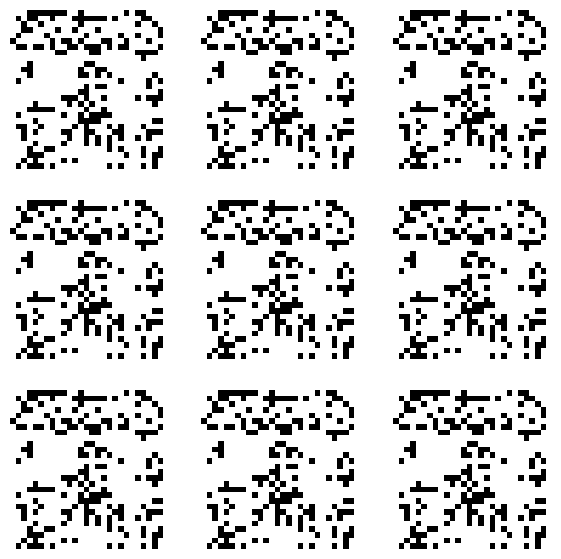

Epoch: 60, Step: 0, [D loss: 2.13300799007006e-13, acc.: 100.0%] [G loss: 126.16253662109375]
Epoch: 60, Step: 50, [D loss: 5.827437122854837e-17, acc.: 100.0%] [G loss: 125.98280334472656]
Epoch: 60, Step: 100, [D loss: 2.8272458507672127e-07, acc.: 100.0%] [G loss: 125.26087188720703]
Epoch: 60, Step: 150, [D loss: 1.975874186488369e-10, acc.: 100.0%] [G loss: 125.80235290527344]
Epoch: 60, Step: 200, [D loss: 1.517948405860281e-10, acc.: 100.0%] [G loss: 126.16368865966797]
Epoch: 60, Step: 250, [D loss: 2.7805505560891594e-16, acc.: 100.0%] [G loss: 126.0731430053711]
Epoch: 60, Step: 300, [D loss: 2.426268008118987e-13, acc.: 100.0%] [G loss: 125.52782440185547]
Epoch: 60, Step: 350, [D loss: 4.552572208105232e-11, acc.: 100.0%] [G loss: 126.34044647216797]
Epoch: 60, Step: 400, [D loss: 6.106715610618152e-13, acc.: 100.0%] [G loss: 126.2506332397461]
Epoch: 60, Step: 450, [D loss: 2.550926296862599e-07, acc.: 100.0%] [G loss: 125.16423034667969]
Epoch: 61, Step: 0, [D loss: 3.448

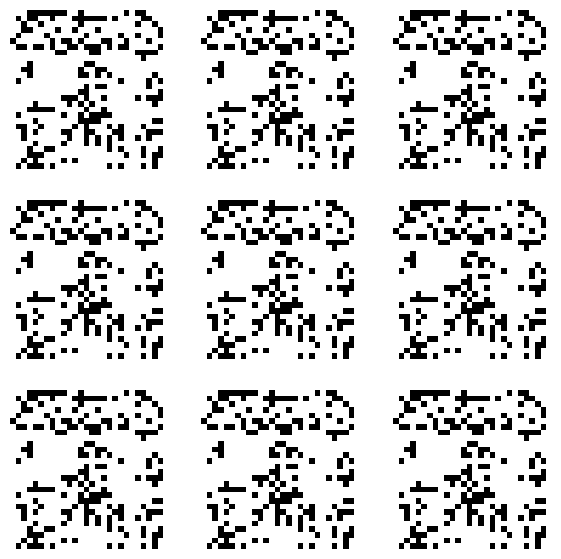

Epoch: 70, Step: 0, [D loss: 5.495668364829953e-10, acc.: 100.0%] [G loss: 125.64836883544922]
Epoch: 70, Step: 50, [D loss: 3.807886450601927e-09, acc.: 100.0%] [G loss: 125.4642562866211]
Epoch: 70, Step: 100, [D loss: 3.9793003961396956e-12, acc.: 100.0%] [G loss: 125.65068054199219]
Epoch: 70, Step: 150, [D loss: 2.496364120142645e-16, acc.: 100.0%] [G loss: 125.2768783569336]
Epoch: 70, Step: 200, [D loss: 1.7625569786235834e-15, acc.: 100.0%] [G loss: 126.21180725097656]
Epoch: 70, Step: 250, [D loss: 8.176279443804831e-15, acc.: 100.0%] [G loss: 125.93421936035156]
Epoch: 70, Step: 300, [D loss: 6.775234151490395e-09, acc.: 100.0%] [G loss: 126.40422058105469]
Epoch: 70, Step: 350, [D loss: 8.88804568138779e-12, acc.: 100.0%] [G loss: 125.56292724609375]
Epoch: 70, Step: 400, [D loss: 4.5242360747523025e-14, acc.: 100.0%] [G loss: 125.28515625]
Epoch: 70, Step: 450, [D loss: 6.222039994478563e-17, acc.: 100.0%] [G loss: 125.65900421142578]
Epoch: 71, Step: 0, [D loss: 2.09374252

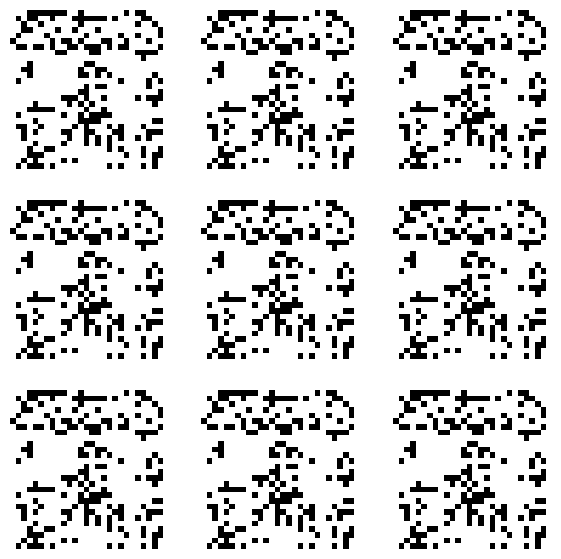

Epoch: 80, Step: 0, [D loss: 7.058796364263487e-13, acc.: 100.0%] [G loss: 125.65205383300781]
Epoch: 80, Step: 50, [D loss: 7.562800212468357e-12, acc.: 100.0%] [G loss: 125.74974822998047]
Epoch: 80, Step: 100, [D loss: 1.1081816887748008e-11, acc.: 100.0%] [G loss: 125.55481719970703]
Epoch: 80, Step: 150, [D loss: 1.25953758599133e-13, acc.: 100.0%] [G loss: 126.51576232910156]
Epoch: 80, Step: 200, [D loss: 6.585458225830468e-14, acc.: 100.0%] [G loss: 125.45336151123047]
Epoch: 80, Step: 250, [D loss: 1.91274235762217e-14, acc.: 100.0%] [G loss: 126.70899200439453]
Epoch: 80, Step: 300, [D loss: 7.092187842206168e-18, acc.: 100.0%] [G loss: 125.83663177490234]
Epoch: 80, Step: 350, [D loss: 7.078631840891526e-17, acc.: 100.0%] [G loss: 126.89439392089844]
Epoch: 80, Step: 400, [D loss: 1.146899307295779e-12, acc.: 100.0%] [G loss: 126.02165222167969]
Epoch: 80, Step: 450, [D loss: 9.54518064588683e-09, acc.: 100.0%] [G loss: 126.02006530761719]
Epoch: 81, Step: 0, [D loss: 1.9177

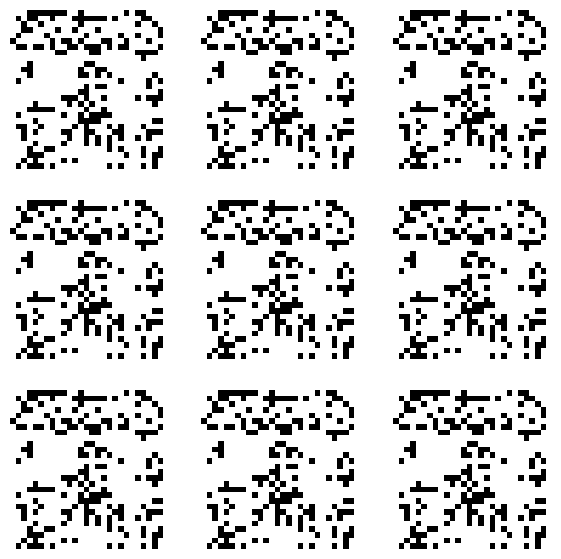

Epoch: 90, Step: 0, [D loss: 3.418267982060554e-20, acc.: 100.0%] [G loss: 125.79995727539062]
Epoch: 90, Step: 50, [D loss: 5.2590196229134e-15, acc.: 100.0%] [G loss: 125.29906463623047]
Epoch: 90, Step: 100, [D loss: 6.934083435054926e-18, acc.: 100.0%] [G loss: 125.09918212890625]
Epoch: 90, Step: 150, [D loss: 4.055662924432315e-19, acc.: 100.0%] [G loss: 124.70276641845703]
Epoch: 90, Step: 200, [D loss: 9.040452414454947e-12, acc.: 100.0%] [G loss: 125.29034423828125]
Epoch: 90, Step: 250, [D loss: 1.6861482540341411e-15, acc.: 100.0%] [G loss: 125.27808380126953]
Epoch: 90, Step: 300, [D loss: 2.3459185643863976e-14, acc.: 100.0%] [G loss: 125.56474304199219]
Epoch: 90, Step: 350, [D loss: 2.083606842617769e-09, acc.: 100.0%] [G loss: 124.47967529296875]
Epoch: 90, Step: 400, [D loss: 1.4671417445326742e-15, acc.: 100.0%] [G loss: 125.95105743408203]
Epoch: 90, Step: 450, [D loss: 3.2842194811139383e-15, acc.: 100.0%] [G loss: 125.74716186523438]
Epoch: 91, Step: 0, [D loss: 1.

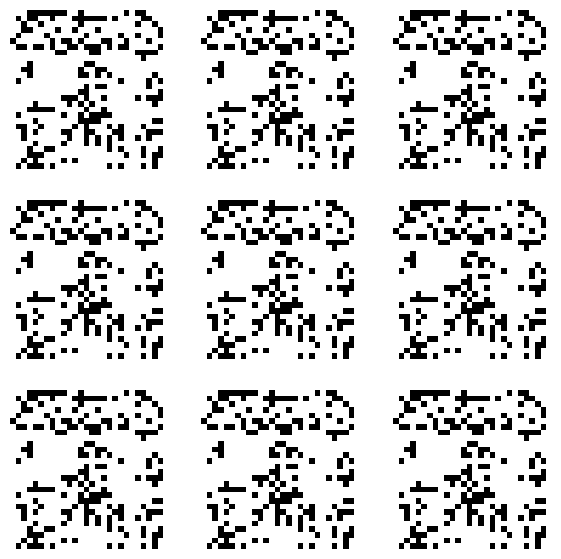

Epoch: 100, Step: 0, [D loss: 8.034918538754035e-16, acc.: 100.0%] [G loss: 125.24510955810547]
Epoch: 100, Step: 50, [D loss: 1.5457443456668704e-18, acc.: 100.0%] [G loss: 125.84219360351562]
Epoch: 100, Step: 100, [D loss: 8.203616457758702e-19, acc.: 100.0%] [G loss: 126.04122161865234]
Epoch: 100, Step: 150, [D loss: 9.38699118435693e-10, acc.: 100.0%] [G loss: 124.95217895507812]
Epoch: 100, Step: 200, [D loss: 1.4155911076045406e-15, acc.: 100.0%] [G loss: 125.25262451171875]
Epoch: 100, Step: 250, [D loss: 7.803349833951916e-20, acc.: 100.0%] [G loss: 125.55126953125]
Epoch: 100, Step: 300, [D loss: 2.168211009700798e-15, acc.: 100.0%] [G loss: 125.55126953125]
Epoch: 100, Step: 350, [D loss: 1.7732783557516951e-12, acc.: 100.0%] [G loss: 125.05638885498047]
Epoch: 100, Step: 400, [D loss: 3.345443313709055e-17, acc.: 100.0%] [G loss: 126.3505859375]
Epoch: 100, Step: 450, [D loss: 4.3535706778747923e-16, acc.: 100.0%] [G loss: 125.06207275390625]
Epoch: 101, Step: 0, [D loss: 

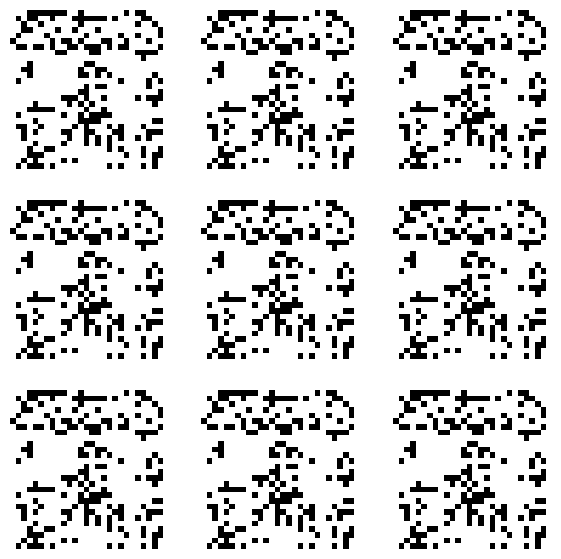

Epoch: 110, Step: 0, [D loss: 1.093829714710312e-20, acc.: 100.0%] [G loss: 125.23738098144531]
Epoch: 110, Step: 50, [D loss: 1.799305714798448e-15, acc.: 100.0%] [G loss: 124.63867950439453]
Epoch: 110, Step: 100, [D loss: 6.913717214398105e-19, acc.: 100.0%] [G loss: 125.84444427490234]
Epoch: 110, Step: 150, [D loss: 2.57457697197018e-14, acc.: 100.0%] [G loss: 125.34501647949219]
Epoch: 110, Step: 200, [D loss: 3.092333987201709e-17, acc.: 100.0%] [G loss: 125.0436782836914]
Epoch: 110, Step: 250, [D loss: 5.367538444961406e-12, acc.: 100.0%] [G loss: 126.04812622070312]
Epoch: 110, Step: 300, [D loss: 2.624914604778286e-16, acc.: 100.0%] [G loss: 126.15140533447266]
Epoch: 110, Step: 350, [D loss: 8.784146188212105e-10, acc.: 100.0%] [G loss: 125.857421875]
Epoch: 110, Step: 400, [D loss: 1.0632104792085012e-17, acc.: 100.0%] [G loss: 126.05976867675781]
Epoch: 110, Step: 450, [D loss: 1.0899145008500366e-19, acc.: 100.0%] [G loss: 125.85881805419922]
Epoch: 111, Step: 0, [D loss

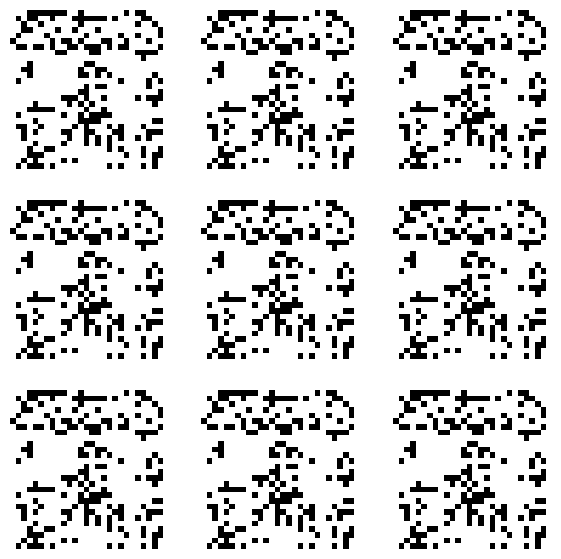

Epoch: 120, Step: 0, [D loss: 2.402140175090077e-16, acc.: 100.0%] [G loss: 126.5972671508789]
Epoch: 120, Step: 50, [D loss: 1.1597894875254285e-22, acc.: 100.0%] [G loss: 124.88937377929688]
Epoch: 120, Step: 100, [D loss: 1.8178769051859456e-24, acc.: 100.0%] [G loss: 126.2005844116211]
Epoch: 120, Step: 150, [D loss: 1.5368886989875624e-13, acc.: 100.0%] [G loss: 124.89269256591797]
Epoch: 120, Step: 200, [D loss: 2.724406589148627e-20, acc.: 100.0%] [G loss: 125.901123046875]
Epoch: 120, Step: 250, [D loss: 1.137200926801484e-19, acc.: 100.0%] [G loss: 125.90744018554688]
Epoch: 120, Step: 300, [D loss: 1.0677844719531038e-10, acc.: 100.0%] [G loss: 124.09504699707031]
Epoch: 120, Step: 350, [D loss: 1.5950200634433254e-19, acc.: 100.0%] [G loss: 126.31413269042969]
Epoch: 120, Step: 400, [D loss: 7.177358287182537e-20, acc.: 100.0%] [G loss: 126.41824340820312]
Epoch: 120, Step: 450, [D loss: 1.292076408582231e-19, acc.: 100.0%] [G loss: 125.91692352294922]
Epoch: 121, Step: 0, [

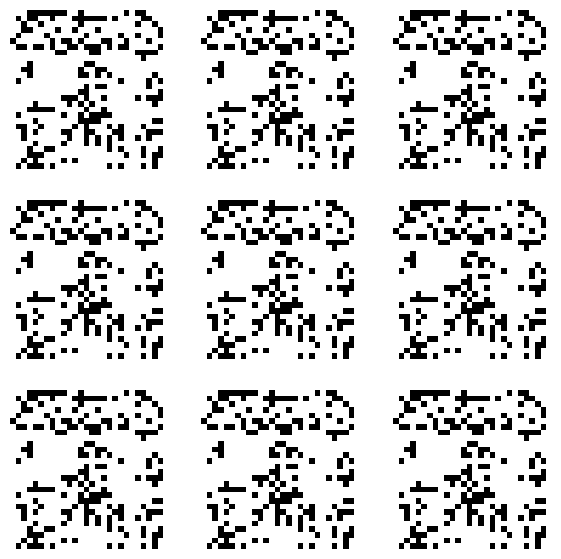

Epoch: 130, Step: 0, [D loss: 3.953990455364542e-15, acc.: 100.0%] [G loss: 125.44339752197266]
Epoch: 130, Step: 50, [D loss: 6.202694059748296e-18, acc.: 100.0%] [G loss: 125.3452377319336]
Epoch: 130, Step: 100, [D loss: 5.093646276793842e-18, acc.: 100.0%] [G loss: 125.44645690917969]
Epoch: 130, Step: 150, [D loss: 1.5942834074090587e-18, acc.: 100.0%] [G loss: 126.45867919921875]
Epoch: 130, Step: 200, [D loss: 4.177034699503694e-21, acc.: 100.0%] [G loss: 125.44645690917969]
Epoch: 130, Step: 250, [D loss: 5.050416477949229e-16, acc.: 100.0%] [G loss: 126.46197509765625]
Epoch: 130, Step: 300, [D loss: 1.9081124437687425e-17, acc.: 100.0%] [G loss: 126.05706024169922]
Epoch: 130, Step: 350, [D loss: 2.0249307279915233e-15, acc.: 100.0%] [G loss: 125.44967651367188]
Epoch: 130, Step: 400, [D loss: 4.5643125916186925e-14, acc.: 100.0%] [G loss: 125.05098724365234]
Epoch: 130, Step: 450, [D loss: 3.096313586215926e-16, acc.: 100.0%] [G loss: 126.46843719482422]
Epoch: 131, Step: 0,

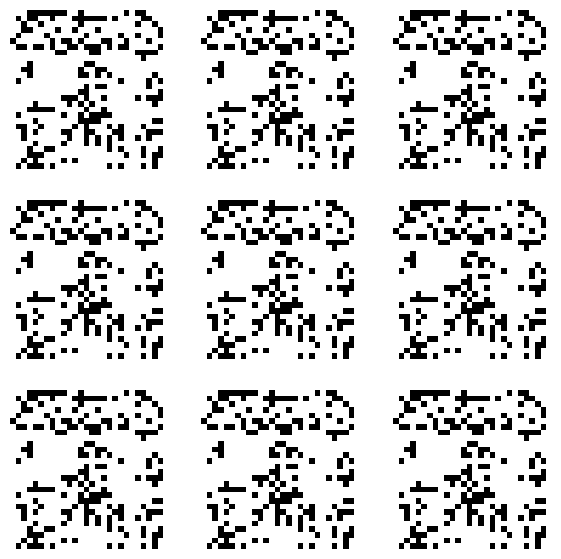

Epoch: 140, Step: 0, [D loss: 1.936891944574748e-13, acc.: 100.0%] [G loss: 125.87187194824219]
Epoch: 140, Step: 50, [D loss: 5.810292524888183e-11, acc.: 100.0%] [G loss: 126.58255004882812]
Epoch: 140, Step: 100, [D loss: 6.932797913664958e-16, acc.: 100.0%] [G loss: 126.2779769897461]
Epoch: 140, Step: 150, [D loss: 5.810265116257263e-11, acc.: 100.0%] [G loss: 126.2779769897461]
Epoch: 140, Step: 200, [D loss: 4.031079289812389e-12, acc.: 100.0%] [G loss: 126.2779769897461]
Epoch: 140, Step: 250, [D loss: 5.562251952020952e-18, acc.: 100.0%] [G loss: 126.68408203125]
Epoch: 140, Step: 300, [D loss: 1.1153893326803447e-14, acc.: 100.0%] [G loss: 125.26273345947266]
Epoch: 140, Step: 350, [D loss: 2.891418433857479e-16, acc.: 100.0%] [G loss: 126.88713073730469]
Epoch: 140, Step: 400, [D loss: 8.733204589182753e-13, acc.: 100.0%] [G loss: 125.46578979492188]
Epoch: 140, Step: 450, [D loss: 1.8730790073956564e-21, acc.: 100.0%] [G loss: 126.48434448242188]
Epoch: 141, Step: 0, [D los

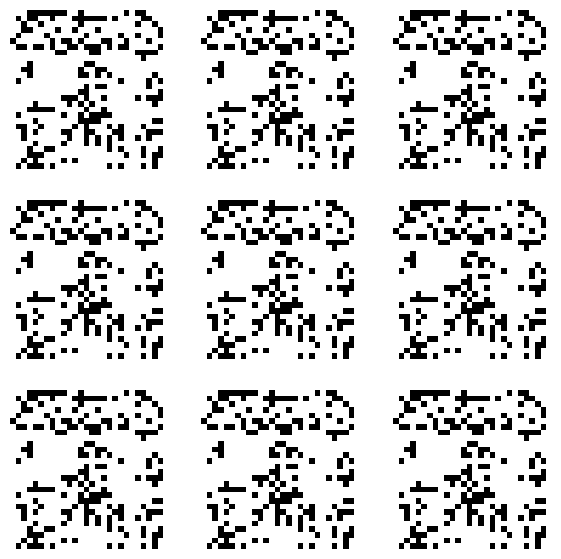

Epoch: 150, Step: 0, [D loss: 2.2334475417695236e-17, acc.: 100.0%] [G loss: 126.45280456542969]
Epoch: 150, Step: 50, [D loss: 2.2091370447785928e-20, acc.: 100.0%] [G loss: 126.15100860595703]
Epoch: 150, Step: 100, [D loss: 4.6629585608461636e-18, acc.: 100.0%] [G loss: 127.26980590820312]
Epoch: 150, Step: 150, [D loss: 3.849968373873151e-20, acc.: 100.0%] [G loss: 126.55785369873047]
Epoch: 150, Step: 200, [D loss: 4.634966934353492e-16, acc.: 100.0%] [G loss: 126.5578384399414]
Epoch: 150, Step: 250, [D loss: 6.594873855694034e-20, acc.: 100.0%] [G loss: 125.33735656738281]
Epoch: 150, Step: 300, [D loss: 1.0487185023512406e-18, acc.: 100.0%] [G loss: 125.74418640136719]
Epoch: 150, Step: 350, [D loss: 4.712805705329528e-18, acc.: 100.0%] [G loss: 126.76126098632812]
Epoch: 150, Step: 400, [D loss: 2.717953417147977e-19, acc.: 100.0%] [G loss: 127.88003540039062]
Epoch: 150, Step: 450, [D loss: 3.309406514020313e-14, acc.: 100.0%] [G loss: 125.94760131835938]
Epoch: 151, Step: 0,

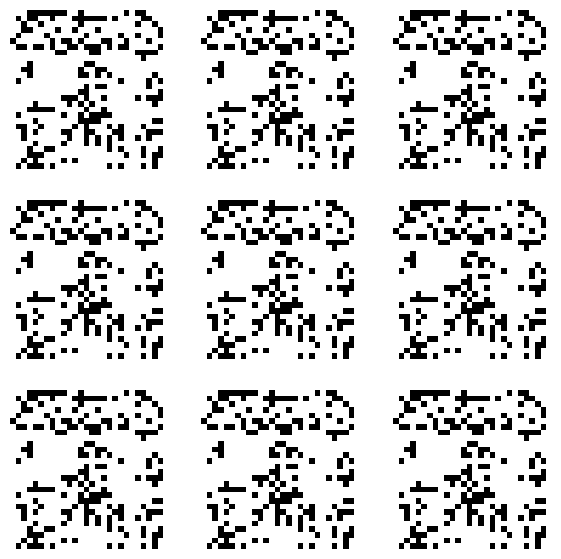

Epoch: 160, Step: 0, [D loss: 8.984823213935896e-15, acc.: 100.0%] [G loss: 127.22956085205078]
Epoch: 160, Step: 50, [D loss: 1.2479303324673105e-16, acc.: 100.0%] [G loss: 126.3128890991211]
Epoch: 160, Step: 100, [D loss: 1.6554978374421522e-15, acc.: 100.0%] [G loss: 127.53511810302734]
Epoch: 160, Step: 150, [D loss: 2.1420611240030326e-18, acc.: 100.0%] [G loss: 126.61845397949219]
Epoch: 160, Step: 200, [D loss: 1.9892101574657274e-16, acc.: 100.0%] [G loss: 124.8869857788086]
Epoch: 160, Step: 250, [D loss: 1.5811379565119425e-18, acc.: 100.0%] [G loss: 126.4181137084961]
Epoch: 160, Step: 300, [D loss: 3.3247461794481817e-18, acc.: 100.0%] [G loss: 127.3382797241211]
Epoch: 160, Step: 350, [D loss: 6.919493037766842e-15, acc.: 100.0%] [G loss: 125.6065444946289]
Epoch: 160, Step: 400, [D loss: 2.671677176213828e-16, acc.: 100.0%] [G loss: 126.31961059570312]
Epoch: 160, Step: 450, [D loss: 3.053883853003386e-16, acc.: 100.0%] [G loss: 126.21773529052734]
Epoch: 161, Step: 0, [

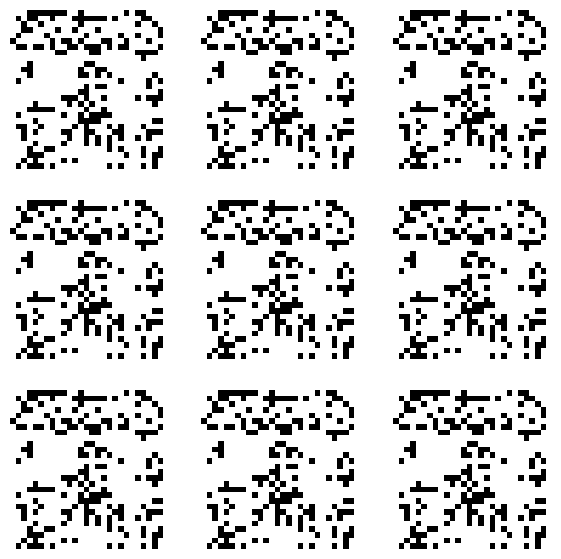

Epoch: 170, Step: 0, [D loss: 2.5710605643204905e-18, acc.: 100.0%] [G loss: 127.09093475341797]
Epoch: 170, Step: 50, [D loss: 1.8167071333263078e-21, acc.: 100.0%] [G loss: 126.88692474365234]
Epoch: 170, Step: 100, [D loss: 1.1180421959685342e-20, acc.: 100.0%] [G loss: 126.68632507324219]
Epoch: 170, Step: 150, [D loss: 6.151255330430873e-15, acc.: 100.0%] [G loss: 126.68955993652344]
Epoch: 170, Step: 200, [D loss: 3.036928694633012e-11, acc.: 100.0%] [G loss: 126.48571014404297]
Epoch: 170, Step: 250, [D loss: 4.779275297869325e-22, acc.: 100.0%] [G loss: 126.79175567626953]
Epoch: 170, Step: 300, [D loss: 6.994475745120132e-12, acc.: 100.0%] [G loss: 126.68974304199219]
Epoch: 170, Step: 350, [D loss: 2.750765539472939e-20, acc.: 100.0%] [G loss: 126.07762908935547]
Epoch: 170, Step: 400, [D loss: 9.390987582363832e-16, acc.: 100.0%] [G loss: 126.59451293945312]
Epoch: 170, Step: 450, [D loss: 3.405645210285968e-10, acc.: 100.0%] [G loss: 126.18635559082031]
Epoch: 171, Step: 0,

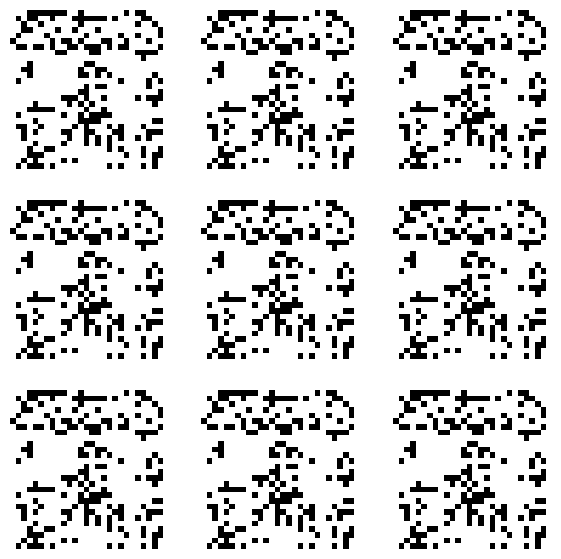

Epoch: 180, Step: 0, [D loss: 2.1839023645053857e-12, acc.: 100.0%] [G loss: 126.66967010498047]
Epoch: 180, Step: 50, [D loss: 3.5475875709289895e-12, acc.: 100.0%] [G loss: 126.26081085205078]
Epoch: 180, Step: 100, [D loss: 5.953989827344819e-15, acc.: 100.0%] [G loss: 126.36642456054688]
Epoch: 180, Step: 150, [D loss: 5.1512825255395356e-11, acc.: 100.0%] [G loss: 126.57086944580078]
Epoch: 180, Step: 200, [D loss: 3.827226965479695e-21, acc.: 100.0%] [G loss: 126.77876281738281]
Epoch: 180, Step: 250, [D loss: 3.9131817747783947e-20, acc.: 100.0%] [G loss: 126.57429504394531]
Epoch: 180, Step: 300, [D loss: 1.0300899022652743e-11, acc.: 100.0%] [G loss: 126.57771301269531]
Epoch: 180, Step: 350, [D loss: 1.326152501657265e-17, acc.: 100.0%] [G loss: 127.70234680175781]
Epoch: 180, Step: 400, [D loss: 4.057958483127955e-11, acc.: 100.0%] [G loss: 127.08890533447266]
Epoch: 180, Step: 450, [D loss: 1.9879594179865408e-19, acc.: 100.0%] [G loss: 126.57771301269531]
Epoch: 181, Step:

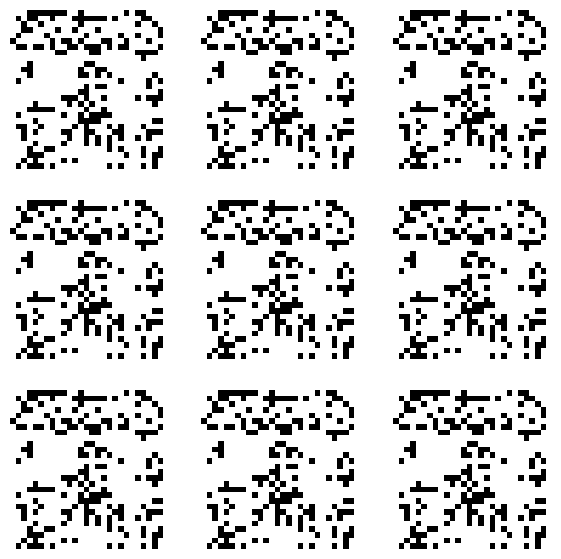

Epoch: 190, Step: 0, [D loss: 6.102128351226366e-14, acc.: 100.0%] [G loss: 126.6799545288086]
Epoch: 190, Step: 50, [D loss: 2.4440256425881087e-20, acc.: 100.0%] [G loss: 127.08890533447266]
Epoch: 190, Step: 100, [D loss: 6.006501041986786e-14, acc.: 100.0%] [G loss: 127.19115447998047]
Epoch: 190, Step: 150, [D loss: 1.9353839364466552e-10, acc.: 100.0%] [G loss: 126.37324523925781]
Epoch: 190, Step: 200, [D loss: 6.639691535257923e-20, acc.: 100.0%] [G loss: 126.47547149658203]
Epoch: 190, Step: 250, [D loss: 5.503407564014848e-18, acc.: 100.0%] [G loss: 126.37324523925781]
Epoch: 190, Step: 300, [D loss: 2.6755310768621615e-17, acc.: 100.0%] [G loss: 126.6799545288086]
Epoch: 190, Step: 350, [D loss: 5.760030581843101e-13, acc.: 100.0%] [G loss: 126.78219604492188]
Epoch: 190, Step: 400, [D loss: 3.0851135535137075e-10, acc.: 100.0%] [G loss: 127.29338836669922]
Epoch: 190, Step: 450, [D loss: 1.8323433614033752e-16, acc.: 100.0%] [G loss: 126.27099609375]
Epoch: 191, Step: 0, [D

In [ ]:
epochs = 200
batch_size = 100
steps = 500

losses_d = []
losses_g = []

for i in range(epochs):
    if i % 10 == 0:
        show_generator_results(generator_network, noise_dim, label_dim)

    for j in range(steps):
        # Train Discriminator
        discriminator_network.trainable = True

        # Get real and fake samples
        fake_samples, fake_labels = get_fake_samples(generator_network, batch_size // 2, noise_dim, label_dim)
        real_samples, real_labels = get_real_samples(batch_size // 2)

        fake_y = np.zeros((batch_size // 2, 1))
        real_y = np.ones((batch_size // 2, 1))

        input_batch = np.vstack((fake_samples, real_samples))
        labels_batch = np.hstack((fake_labels, real_labels))
        output_labels = np.vstack((fake_y, real_y))

        loss_d = discriminator_network.train_on_batch([input_batch, labels_batch], output_labels)

        # Train Generator
        discriminator_network.trainable = False

        gan_input = get_random_noise(batch_size, noise_dim)
        gan_labels = np.random.randint(0, label_dim, batch_size)
        gan_output = np.ones((batch_size, 1))

        loss_g = gan_model.train_on_batch([gan_input, gan_labels], gan_output)

        losses_d.append(loss_d[0])
        losses_g.append(loss_g)

        if j % 50 == 0:
          print(f"Epoch: {i}, Step: {j}, [D loss: {loss_d[0]}, acc.: {100 * loss_d[1]}%] [G loss: {loss_g}]")


Dari discriminator loss dan generator loss terlihat bahwa diskriminator belajar lebih cepat daripada generator dan mampu membedakan yang mana image asli dan yang palsu. Generator tidak mampu menghasilkan image yang cukup realistis untuk diskriminator. Hal ini mungkin dikarenakan arsitektur diskriminator yang lebih kompleks (lebih banyak neuron). Dari image yang ditampilkan semasa training pun terlihat bahwa image yang dihasilkan oleh generator tidak terlalu berbentuk, hanya berisi hitam putih dan kita tidak tahu apa image yang dia generate sebenarnya.

Plot Loss

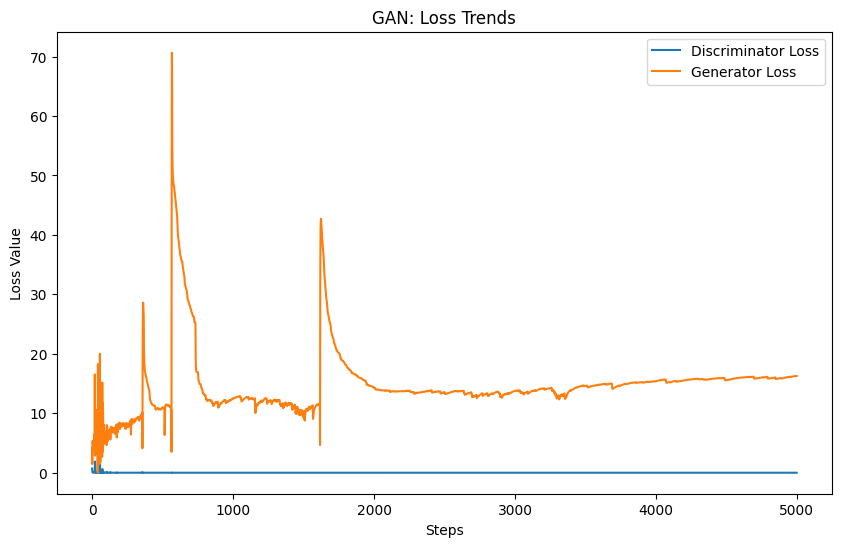

In [ ]:
steps = [i for i in range(len(losses_d))]
plt.figure(figsize=(10, 6))
plt.plot(losses_d[:5000])
plt.plot(losses_g[:5000])
plt.xlabel('Steps')
plt.ylabel('Loss Value')
plt.title("GAN: Loss Trends")
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()

Loss yang dialami generator sempat melonjak dan perlahan menurun dan stabil, tetapi loss diskriminator konstan berada di 0.

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from scipy.linalg import sqrtm

Generate Images

In [ ]:
def generate_images(generator, noise_dim, label_dim, num_samples):
    noise = np.random.normal(0, 1, (num_samples, noise_dim))
    labels = np.random.randint(0, label_dim, num_samples).reshape(-1, 1)
    generated_images = generator.predict([noise, labels])
    return generated_images

num_samples = 10000
generated_images = generate_images(generator_network, noise_dim, label_dim, num_samples)

313/313 [==============================] - 1s 1ms/step


Resize image and preprocess

In [ ]:
def resize_images(images):
    resized_images = tf.image.resize(images, (75, 75))
    resized_images = tf.image.grayscale_to_rgb(resized_images)  # Convert grayscale to RGB
    return resized_images

x_test_resized = resize_images(x_test)
generated_images_resized = resize_images(generated_images)

# Preprocess images for InceptionV3
x_test_resized = preprocess_input(x_test_resized)
generated_images_resized = preprocess_input(generated_images_resized)

Load Model and extract features

In [ ]:
inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(75, 75, 3))

# Extract features
real_features = inception_model.predict(x_test_resized)
fake_features = inception_model.predict(generated_images_resized)

313/313 [==============================] - 4s 12ms/step


Calculate FID

In [ ]:
def calculate_fid(real_features, fake_features):
    mu_real, sigma_real = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
    mu_fake, sigma_fake = np.mean(fake_features, axis=0), np.cov(fake_features, rowvar=False)

    ssdiff = np.sum((mu_real - mu_fake)**2.0)
    covmean = sqrtm(sigma_real.dot(sigma_fake))

    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = ssdiff + np.trace(sigma_real + sigma_fake - 2.0 * covmean)
    return fid

fid_value = calculate_fid(real_features, fake_features)
print("FID: ", fid_value)

FID:  2954937499953.5884


Hasil FID yang besar menunjukkan bahwa generator masih tidak mampu mengenerate gambar dengan baik

Link Video
https://drive.google.com/drive/folders/1RrJKYm7hmXG7dGczXuOPMJO3pXTOKbk5?usp=sharing
*Video digabung untuk no. 1-3